<a href="https://colab.research.google.com/github/Nzaya/Flood-Prediction-in-Malawi/blob/master/Flood_Prediction_in_Malawi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLOOD PREDICTION IN MALAWI

## HISTORY
In recent decades, countries across Africa have experienced an increase in the frequency and severity of floods. Malawi has been hit with major floods in 2015 and again in 2019. In fact, between 1946 and 2013, floods accounted for 48% of major disasters in Malawi. The Lower Shire Valley in southern Malawi, bordering Mozambique, composed of Chikwawa and Nsanje Districts is the area most prone to flooding.

## OBJECTIVE
The objective of this challenge is to build a machine learning model that helps predict the location and extent of floods in southern Malawi.


In [0]:
#Loading necessary libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
# Load the sample submission data

sub = pd.read_csv('/content/SampleSubmission.csv')
sub.head()

,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.109
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.504
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.021
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.827
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.786


In [50]:
# Load the train data

train = pd.read_csv('/content/Train.csv')
train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


# DATA EXPLORATION

In [12]:
#Checking information about the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5140 entries, 0 to 5139
Data columns (total 40 columns):
X                                 5140 non-null float64
Y                                 5140 non-null float64
target_2015                       5140 non-null float64
elevation                         5140 non-null float64
precip 2014-11-16 - 2014-11-23    5140 non-null float64
precip 2014-11-23 - 2014-11-30    5140 non-null int64
precip 2014-11-30 - 2014-12-07    5140 non-null int64
precip 2014-12-07 - 2014-12-14    5140 non-null float64
precip 2014-12-14 - 2014-12-21    5140 non-null float64
precip 2014-12-21 - 2014-12-28    5140 non-null float64
precip 2014-12-28 - 2015-01-04    5140 non-null float64
precip 2015-01-04 - 2015-01-11    5140 non-null float64
precip 2015-01-11 - 2015-01-18    5139 non-null float64
precip 2015-01-18 - 2015-01-25    5139 non-null float64
precip 2015-01-25 - 2015-02-01    5139 non-null float64
precip 2015-02-01 - 2015-02-08    5139 non-null float64
p

In [13]:
# Checking statistical information about the dataset

train.describe()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
count,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.0,5140.0,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000,5139.0,5139.000000,5139.0,5139.0,5139.000000
mean,34.628944,-15.859315,0.015915,418.174860,0.460622,0.0,0.0,10.736648,11.367283,10.095913,33.213367,28.944642,44.655936,1.608994,33.354758,34.423693,11.808848,1.799484,15.630254,5.368407,0.018049,15.578433,4.161699,27.101320,10.401152,29.285298,0.302519,60.454302,17.494228,29.265301,0.380233,0.868120,3.754702,8.726037,0.0,0.213230,0.0,0.0,9.535707
std,0.137352,0.336536,0.086430,275.588034,0.907652,0.0,0.0,4.141517,4.307016,5.210836,16.925936,8.741299,7.615621,2.076056,5.070797,6.078223,7.183568,1.324008,3.682491,1.810947,0.082851,5.966681,4.222617,7.823606,3.821893,9.900450,0.491732,11.061011,7.359877,8.249855,0.571076,1.056929,4.015092,7.702392,0.0,0.718849,0.0,0.0,1.117485
min,34.260000,-16.620000,0.000000,76.222236,0.000000,0.0,0.0,2.402571,4.279658,1.254098,7.462999,15.648154,30.449468,0.000000,17.688384,19.764874,0.779057,0.279002,6.932778,3.283425,0.000000,4.282713,0.000000,15.448307,2.801546,12.780855,0.000000,32.108226,0.501172,15.803429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,4.000000
25%,34.530000,-16.120000,0.000000,217.244896,0.000000,0.0,0.0,7.190788,8.853561,6.179885,19.695059,23.364965,40.817465,0.000000,30.037450,32.878318,4.440632,0.963981,12.832311,4.109080,0.000000,12.677108,0.000000,20.149642,8.534574,24.953875,0.000000,50.308544,13.641250,21.370089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,9.000000
50%,34.640000,-15.860000,0.000000,344.510564,0.000000,0.0,0.0,10.631491,10.175686,11.832622,36.766045,26.286350,44.371597,0.502164,35.020538,33.686993,10.143014,1.025793,15.165961,4.840210,0.000000,13.848403,1.613670,24.213460,10.266283,28.083314,0.000000,58.927883,18.264692,29.871969,0.000000,0.000000,3.000000,11.046171,0.0,0.000000,0.0,0.0,10.000000
75%,34.740000,-15.590000,0.000000,548.351762,0.554881,0.0,0.0,14.468074,14.552823,12.744113,51.319601,34.097452,49.547661,3.144690,36.384603,37.311030,19.736477,2.808708,19.836449,6.602046,0.000000,19.344361,6.956616,33.270042,13.691211,37.148445,0.551944,68.824316,22.737015,36.115301,0.738516,1.680000,8.009999,14.660907,0.0,0.000000,0.0,0.0,10.000000
max,34.840000,-15.210000,1.000000,1567.194773,2.941325,0.0,0.0,18.870675,23.044340,18.615438,62.433432,51.197420,60.744787,11.103658,46.660279,44.341312,28.559923,8.540508,25.358950,10.884544,0.413405,25.101563,13.361950,46.225504,18.758182,52.682312,2.164153,84.675319,36.740809,47.358037,2.076590,4.080264,11.022964,46.367849,0.0,3.210000,0.0,0.0,13.000000


In [14]:
# Checking for unique values

for i in train.columns:
  print (i)
  print(train[i].nunique())
  print(train[i].unique())
  print('\n')

X
59
[34.26 34.27 34.28 34.29 34.3  34.31 34.32 34.33 34.34 34.35 34.36 34.37
 34.38 34.39 34.4  34.41 34.42 34.43 34.44 34.45 34.46 34.47 34.48 34.49
 34.5  34.51 34.52 34.53 34.54 34.55 34.56 34.57 34.58 34.59 34.6  34.61
 34.62 34.63 34.64 34.65 34.66 34.67 34.68 34.69 34.7  34.71 34.72 34.73
 34.74 34.75 34.76 34.77 34.78 34.79 34.8  34.81 34.82 34.83 34.84]


Y
142
[-15.91 -15.9  -15.89 -15.88 -15.87 -15.86 -15.85 -15.84 -15.83 -15.92
 -15.82 -15.81 -15.8  -15.79 -15.78 -15.93 -15.77 -15.94 -15.76 -15.75
 -15.95 -15.96 -15.74 -15.97 -15.98 -16.   -15.99 -16.01 -15.73 -15.72
 -15.71 -16.02 -15.7  -16.03 -15.69 -16.2  -16.19 -16.18 -16.17 -16.16
 -16.15 -16.14 -16.13 -15.68 -16.22 -16.21 -16.12 -16.11 -16.04 -15.67
 -16.25 -16.24 -16.23 -16.1  -16.09 -16.08 -16.07 -16.06 -16.05 -15.66
 -15.65 -15.64 -15.51 -15.5  -15.49 -16.26 -15.63 -15.62 -15.61 -15.6
 -15.59 -15.58 -15.57 -15.56 -15.53 -15.52 -15.48 -15.47 -16.27 -15.55
 -15.54 -16.28 -16.29 -15.46 -15.45 -15.44 -15.43 -15.42 -15

In [51]:
# Checking for the shape of the dataset

train.shape

(16466, 40)

In [52]:
#Checking the size of the dataset

train.size

658640

In [17]:
#Checking for duplicated values

train.duplicated().any()

False

In [18]:
# Checking for data types

train.dtypes

X                                 float64
Y                                 float64
target_2015                       float64
elevation                         float64
precip 2014-11-16 - 2014-11-23    float64
precip 2014-11-23 - 2014-11-30      int64
precip 2014-11-30 - 2014-12-07      int64
precip 2014-12-07 - 2014-12-14    float64
precip 2014-12-14 - 2014-12-21    float64
precip 2014-12-21 - 2014-12-28    float64
precip 2014-12-28 - 2015-01-04    float64
precip 2015-01-04 - 2015-01-11    float64
precip 2015-01-11 - 2015-01-18    float64
precip 2015-01-18 - 2015-01-25    float64
precip 2015-01-25 - 2015-02-01    float64
precip 2015-02-01 - 2015-02-08    float64
precip 2015-02-08 - 2015-02-15    float64
precip 2015-02-15 - 2015-02-22    float64
precip 2015-02-22 - 2015-03-01    float64
precip 2015-03-01 - 2015-03-08    float64
precip 2015-03-08 - 2015-03-15    float64
precip 2019-01-20 - 2019-01-27    float64
precip 2019-01-27 - 2019-02-03    float64
precip 2019-02-03 - 2019-02-10    

# SEPARATING DATA INTO TRAIN AND TEST

In [0]:
precip_features_2019 = []
precip_features_2015 = []
for col in train.columns:
  if '2019' in col:
    precip_features_2019.append(col)
  elif 'precip 2014' in col:
    precip_features_2015.append(col)
  elif 'precip 2015' in col:
    precip_features_2015.append(col)

In [60]:
# Viewing the 2019 dataframe which will be our train dataset

df= train[train.columns.difference(precip_features_2019)]
df.head()

,LC_Type1_mode,Square_ID,X,Y,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,target_2015
0,9,4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
1,9,4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
2,9,4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
3,10,4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
4,10,4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0


In [61]:
#Test dataset

list = ['X', 'Y',	'elevation', 'LC_Type1_mode',	'Square_ID']
precip_features_2019.extend(list)
test = train[precip_features_2019]
test.head()

,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,X,Y,elevation,LC_Type1_mode,Square_ID
0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,34.26,-15.91,887.764222,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,34.26,-15.90,743.403912,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,34.26,-15.89,565.728343,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,34.26,-15.88,443.392774,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,34.26,-15.87,437.443428,10,4e3c389a-14ce-11ea-bce5-f49634744a41


# DATA CLEANING


In [62]:
# Uniformity in columns
# Changing date time to week number

new_2015_cols = {}
for col, number in zip(precip_features_2015, range(1, len(precip_features_2015) + 1)):
  if 'precip' in col:
    new_2015_cols[col] = 'week_' + str(number) + '_precip'

    
# Creating a dictionary of column names to be renamed for the testing dataset
#
new_2019_cols = {}
for col, number in zip(precip_features_2019, range(1, len(precip_features_2019) + 1)):
  if 'precip' in col:
    new_2019_cols[col] = 'week_' + str(number) + '_precip'
    
# Renaming the columns
#
df.rename(columns = new_2015_cols, inplace = True)
test.rename(columns = new_2019_cols, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [63]:
# Previewing our train data (df)

df.head()

,LC_Type1_mode,Square_ID,X,Y,elevation,week_1_precip,week_2_precip,week_3_precip,week_4_precip,week_5_precip,week_6_precip,week_7_precip,week_8_precip,week_9_precip,week_10_precip,week_11_precip,week_12_precip,week_13_precip,week_14_precip,week_15_precip,week_16_precip,week_17_precip,target_2015
0,9,4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
1,9,4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
2,9,4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
3,10,4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0
4,10,4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,0.0


In [64]:
#Separating the target variable

target = df.target_2015


# Aligning the training and testing datasets

df, test = df.align(test, join = 'inner', axis = 1)


# Previewing the first three rows of the cleaned and realigned test set

test.head()

,LC_Type1_mode,Square_ID,X,Y,elevation,week_1_precip,week_2_precip,week_3_precip,week_4_precip,week_5_precip,week_6_precip,week_7_precip,week_8_precip,week_9_precip,week_10_precip,week_11_precip,week_12_precip,week_13_precip,week_14_precip,week_15_precip,week_16_precip,week_17_precip
0,9,4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,887.764222,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0
1,9,4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,743.403912,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0
2,9,4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,565.728343,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0
3,10,4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,443.392774,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0
4,10,4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,437.443428,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0


# MODELLING

## REGRESSION MODELS

In [71]:
# Installing catboost

!pip install catboost

     |████████████████████████████████| 63.9MB 71kB/s 


In [0]:
#Importing the required libraries

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import seaborn as sns

In [0]:
# Creating a list of regressor algorithms to compare with

models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(),  XGBRegressor(objective ='reg:squarederror'),\
          SVR(), KNeighborsRegressor(), LinearRegression(), CatBoostRegressor(logging_level='Silent')]

In [0]:
# Creating lists of the algorithms, to store the accuracy scores of each fold

RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat = ([] for x in range(9))

In [0]:
# Creating a list containig the list of each algorithm. Created for easy iteration

model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat]

In [0]:
# Splitting into X and y variables

X= df.drop('Square_ID', axis=1)
y= target.values

In [0]:
# Creating a cross validation of 10 folds

kfold  = KFold(n_splits=10, random_state=101)

In [0]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state= 0)

In [0]:
# Creating way for our pipeline

scaler= StandardScaler()
pca= PCA()
Cat= CatBoostRegressor()

In [0]:
# Pass everything in the pipeline

pipe= Pipeline([
                ('scaler', StandardScaler()),
                ('reduce_dim', PCA()),
                ('cat',CatBoostRegressor())
])

In [150]:
#Train and test it

pipe= pipe.fit(X_train,y_train)
print('Score: ', pipe.score(X_test,y_test))

0:	learn: 0.2257949	total: 11.8ms	remaining: 11.8s
1:	learn: 0.2230555	total: 23.9ms	remaining: 11.9s
2:	learn: 0.2203530	total: 35.1ms	remaining: 11.6s
3:	learn: 0.2175395	total: 46.2ms	remaining: 11.5s
4:	learn: 0.2150399	total: 55.6ms	remaining: 11.1s
5:	learn: 0.2126727	total: 65.7ms	remaining: 10.9s
6:	learn: 0.2103792	total: 80.3ms	remaining: 11.4s
7:	learn: 0.2081489	total: 95.6ms	remaining: 11.8s
8:	learn: 0.2055899	total: 104ms	remaining: 11.5s
9:	learn: 0.2036899	total: 113ms	remaining: 11.2s
10:	learn: 0.2014180	total: 122ms	remaining: 11s
11:	learn: 0.1993963	total: 130ms	remaining: 10.7s
12:	learn: 0.1974078	total: 140ms	remaining: 10.7s
13:	learn: 0.1957592	total: 153ms	remaining: 10.8s
14:	learn: 0.1939811	total: 162ms	remaining: 10.6s
15:	learn: 0.1922564	total: 171ms	remaining: 10.5s
16:	learn: 0.1905552	total: 180ms	remaining: 10.4s
17:	learn: 0.1888321	total: 188ms	remaining: 10.3s
18:	learn: 0.1872163	total: 196ms	remaining: 10.1s
19:	learn: 0.1855271	total: 203ms	r

In [0]:
#Predict based on the model we've trained

y_pred= pipe.predict(X_test)

In [134]:
#Find MAE, MSE, RSME

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.04807929824688955
Mean Squared Error: 0.012524003781194617
Root Mean Squared Error:  0.11191069556210709


# TEST DATA

In [135]:
submission = test.drop('Square_ID', axis= 1)

for model in zip(models):
  regressor = pipe
  regressor.fit(X,y)
  predictions=regressor.predict(submission)
  submission_df= pd.DataFrame({'Square_ID': test.Square_ID, 'target_2019': predictions})


0:	learn: 0.2256737	total: 9.06ms	remaining: 9.05s
1:	learn: 0.2228782	total: 17.9ms	remaining: 8.94s
2:	learn: 0.2202029	total: 27.1ms	remaining: 9s
3:	learn: 0.2174192	total: 36.3ms	remaining: 9.04s
4:	learn: 0.2148437	total: 45.9ms	remaining: 9.13s
5:	learn: 0.2124324	total: 55.5ms	remaining: 9.19s
6:	learn: 0.2099514	total: 64ms	remaining: 9.08s
7:	learn: 0.2078012	total: 70.8ms	remaining: 8.78s
8:	learn: 0.2056613	total: 82.5ms	remaining: 9.08s
9:	learn: 0.2035247	total: 93.7ms	remaining: 9.27s
10:	learn: 0.2014616	total: 101ms	remaining: 9.08s
11:	learn: 0.1994809	total: 108ms	remaining: 8.89s
12:	learn: 0.1973500	total: 116ms	remaining: 8.78s
13:	learn: 0.1956758	total: 123ms	remaining: 8.65s
14:	learn: 0.1939508	total: 130ms	remaining: 8.53s
15:	learn: 0.1921907	total: 137ms	remaining: 8.44s
16:	learn: 0.1905576	total: 145ms	remaining: 8.37s
17:	learn: 0.1888145	total: 152ms	remaining: 8.31s
18:	learn: 0.1873912	total: 160ms	remaining: 8.25s
19:	learn: 0.1857358	total: 167ms	re

In [0]:
submission_df.to_csv("submission2.csv", index=False)

## LINEAR REGRESSION USING TENSORFLOW

In [0]:
# Importing necessary libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.layers.core import Dropout
from keras.constraints import MinMaxNorm, nonneg

In [0]:
# Splitting into X and y variables

X= df.drop('Square_ID', axis=1)
y= target

In [0]:
# MinMax Scale and Binarize the target labels

scaler = MinMaxScaler()
X= scaler.fit_transform(X,y)


In [0]:
#Train fraction

frac= 0.9

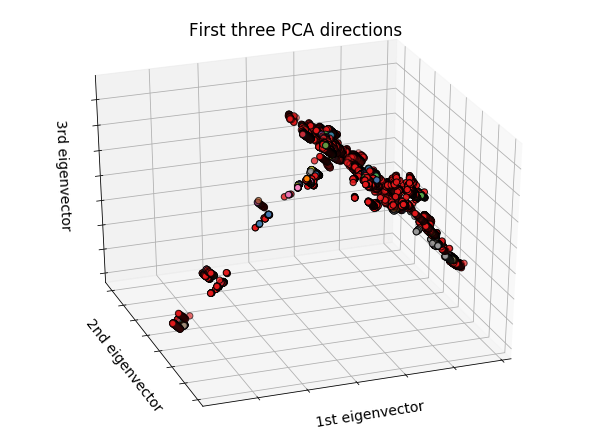

In [165]:
# plot the first 3 PCA dimensions of the sampled data

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y.ravel(),
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [0]:
#Making the random numbers predictable,  define fixed seeds for both Numpy and Tensorflow.

np.random.seed(101) 
tf.set_random_seed(101) 

In [0]:
#generate some random data for training the Linear Regression Model.

# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 

x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 

x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

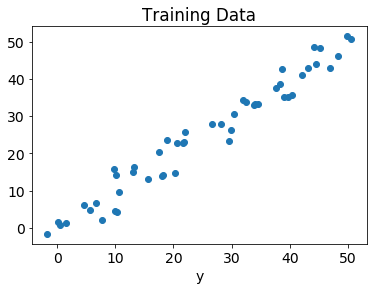

In [189]:
#Visualize the training data.
# Plot of Training Data 

plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
#Creating our model by defining the placeholders X and Y, so that we can feed our training examples X and Y into the optimizer during the training process.

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [0]:
#Now we will declare two trainable Tensorflow Variables for the Weights and Bias and initializing them randomly using np.random.randn().

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [0]:
#define the hyperparameters of the model, the Learning Rate and the number of Epochs.

learning_rate = 0.01
training_epochs = 1000

Building the Hypothesis, the Cost Function, and the Optimizer. We won’t be implementing the Gradient Descent Optimizer manually since it is built inside Tensorflow. After that, we will be initializing the Variables.

In [0]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [194]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.886804 W = 0.9951241 b = 1.2381054
Epoch 100 : cost = 5.7912707 W = 0.99812365 b = 1.0914398
Epoch 150 : cost = 5.7119675 W = 1.0008028 b = 0.96044314
Epoch 200 : cost = 5.6459417 W = 1.0031956 b = 0.8434396
Epoch 250 : cost = 5.590799 W = 1.0053328 b = 0.7389357
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455922
Epoch 350 : cost = 5.5057883 W = 1.008947 b = 0.56222
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775345
Epoch 450 : cost = 5.4453845 W = 1.0118302 b = 0.42124167
Epoch 500 : cost = 5.421903 W = 1.0130452 b = 0.36183488
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.30877414
Epoch 600 : cost = 5.3848577 W = 1.0150996 b = 0.26138115
Epoch 650 : cost = 5.3702464 W = 1.0159653 b = 0.21905091
Epoch 700 : cost = 5.3577 W = 1.0167387 b = 0.18124212
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747244
Epoch 800 : cost = 5.3375573 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294764 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W = 1

In [195]:
# Calculating the predictions 

predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561663 



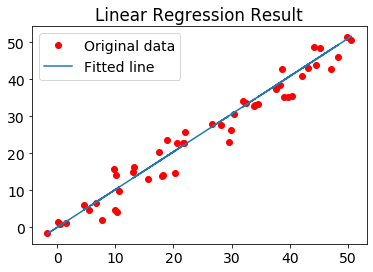

In [196]:
# Plotting the Results 

plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show()

## TEST DATA

In [198]:
submission = test.drop('Square_ID', axis= 1)
prediction=predictions.predict(submission)

submission_df= pd.DataFrame({'Square_ID': test.Square_ID, 'target_2019': predictions})

AttributeError: ignored